<a href="https://colab.research.google.com/github/neotracer1/ATENEA_UNAL_403_2025/blob/main/Clasificaci%C3%B3n_Coberturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificación de humedales para la ciudad de Bogotá por el proyecto de ATENEA


## 1. Inicialmente se importan las librerrias

In [ ]:
!pip install earthpy gdal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 15.8 MB/s eta 0:00:00


In [ ]:
# ===========================================================
#   LIBRERÍAS PARA MANEJO DE ARCHIVOS Y RASTERS
# ===========================================================
import os
from glob import glob
import rasterio as rio
from rasterio.plot import plotting_extent, show, reshape_as_raster, reshape_as_image

# ===========================================================
#   LIBRERÍAS PARA ANÁLISIS NUMÉRICO Y GRÁFICOS
# ===========================================================
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap

# ===========================================================
#   LIBRERÍAS PARA ANÁLISIS GEOESPACIAL
# ===========================================================
import geopandas as gpd

# ===========================================================
#   LIBRERÍAS PARA MODELADO Y MACHINE LEARNING
# ===========================================================
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.tree import plot_tree

# ===========================================================
#   LIBRERÍAS ADICIONALES (plotly, seaborn, scipy)
# ===========================================================
import seaborn as sns
import plotly.graph_objects as go
from scipy.io import loadmat

# ===========================================================
#   GOOGLE COLAB
# ===========================================================
from google.colab import drive

import rasterio as rio
import numpy as np
from sklearn.preprocessing import StandardScaler

# Ignorar warnings de división
np.seterr(divide="ignore", invalid="ignore")


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

##2. Se hace la conexión a drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/

/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE


In [ ]:
!ls

mascaras_binarias_por_roi  planet_indices.tif
MOSAICO_FEB_2025.tif	   recortes_por_roi


In [ ]:
S_sentinel_bands = glob("/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/S2_BOGOTA_2024.tif")
S_sentinel_bands.sort()
S_sentinel_bands

[]

In [ ]:
rutas = [
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/pdem_entre_nubes_cerro_juan_rey_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/pdem_entre_nubes_cuchilla_guacamayas_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/pdem_entre_nubes_cuchilla_el_gavilan_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/pdem_mirador_de_los_nevados_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/pdem_serrania_del_zuque_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/pdem_soratama_clip.tif",

    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_chiguasuque_la_isla_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_complejo_de_humedales_el_tunjo_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_salitre_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_tingua_azul_clip.tif",

    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_de_capellania_o_la_cofradia_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_de_cordoba_niza_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_de_jaboque_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_de_juan_amarillo_o_tibabuyes_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_de_la_conejera_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_de_santa_maria_del_lago_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_de_techo_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_de_tibanica_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_de_torca_y_guaymaral_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_de_la_vaca_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_del_burro_clip.tif",
    "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/RASTER_GEE/recortes_por_roi/rdh_del_meandro_del_say_clip.tif"
]

## 3. Selección de raster

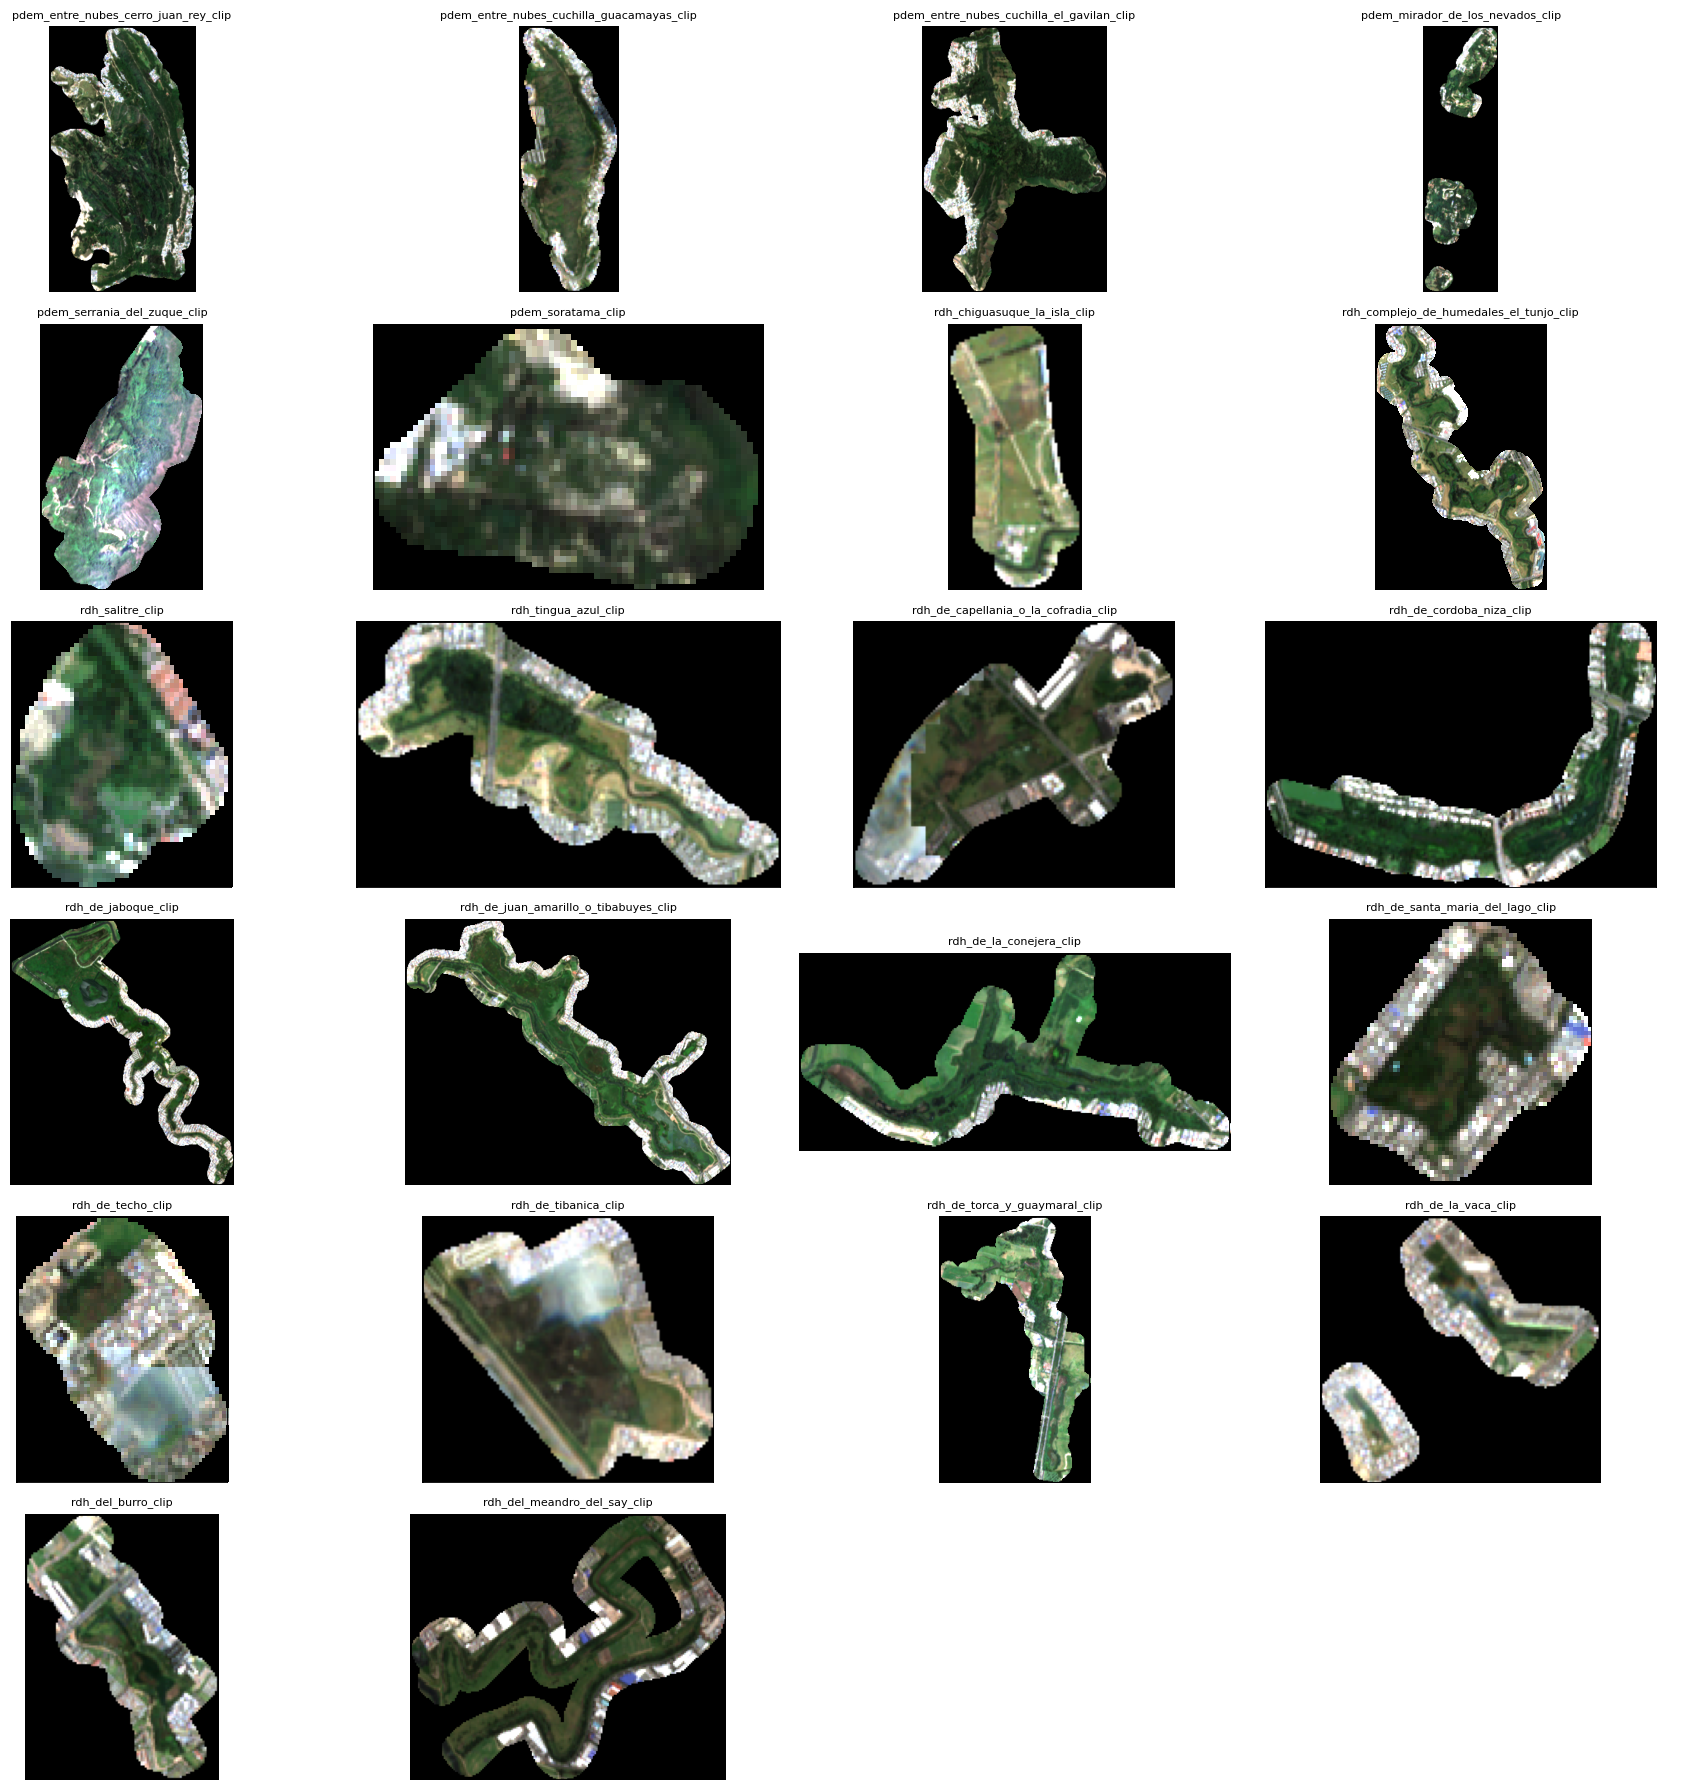

In [ ]:


# --- Función de stretch por percentiles ---
def stretch_percentile(band, pmin=2, pmax=98):
    min_val, max_val = np.percentile(band, (pmin, pmax))
    return np.clip((band - min_val) / (max_val - min_val), 0, 1)

# --- Función para obtener el RGB procesado ---
def cargar_rgb(ruta):
    with rio.open(ruta) as src:
        r = src.read(3).astype(float)
        g = src.read(2).astype(float)
        b = src.read(1).astype(float)

    r_st = stretch_percentile(r)
    g_st = stretch_percentile(g)
    b_st = stretch_percentile(b)

    return np.dstack((r_st, g_st, b_st))

# --------------------------------------------------------------

# --- Crear el mosaico ---
n = len(rutas)
cols = 4  # número de columnas
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(18, 18))
axes = axes.flatten()

for i, ruta in enumerate(rutas):
    rgb = cargar_rgb(ruta)
    nombre = ruta.split("/")[-1].replace(".tif", "")

    ax = axes[i]
    ax.imshow(rgb)
    ax.set_title(nombre, fontsize=8)
    ax.axis("off")

    # --- Agregar borde ---
    rect = patches.Rectangle(
        (0, 0), 1, 1, transform=ax.transAxes,
        linewidth=2, edgecolor='black', facecolor='none'
    )
    ax.add_patch(rect)

# Ocultar celdas vacías
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

# Guardar archivo con bordes
fig.savefig("mosaico_humedales_bordes.png", dpi=300, bbox_inches="tight")


In [ ]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
import math

# --- Stretch opcional para mejorar contraste ---
def stretch_percentile(band, pmin=2, pmax=98):
    min_val, max_val = np.percentile(band, (pmin, pmax))
    return np.clip((band - min_val) / (max_val - min_val), 0, 1)

# --- Mostrar todas las bandas en un mosaico ---
def mosaico_bandas(ruta, stretch=False, cols=3):
    with rio.open(ruta) as src:
        n_bandas = src.count
        nombre = ruta.split("/")[-1]

        # Definir tamaño de grilla (número de filas)
        rows = math.ceil(n_bandas / cols)

        fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
        axes = axes.flatten()

        for i in range(n_bandas):
            band = src.read(i + 1)

            if stretch:
                band = stretch_percentile(band)

            ax = axes[i]
            ax.imshow(band, cmap="gray")
            ax.set_title(f"Banda {i + 1}", fontsize=10)
            ax.axis("off")

        # Ocultar celdas vacías si sobran
        for j in range(i + 1, len(axes)):
            axes[j].axis("off")

        plt.suptitle(f"Bandas de {nombre}", fontsize=14)
        plt.tight_layout()
        plt.show()



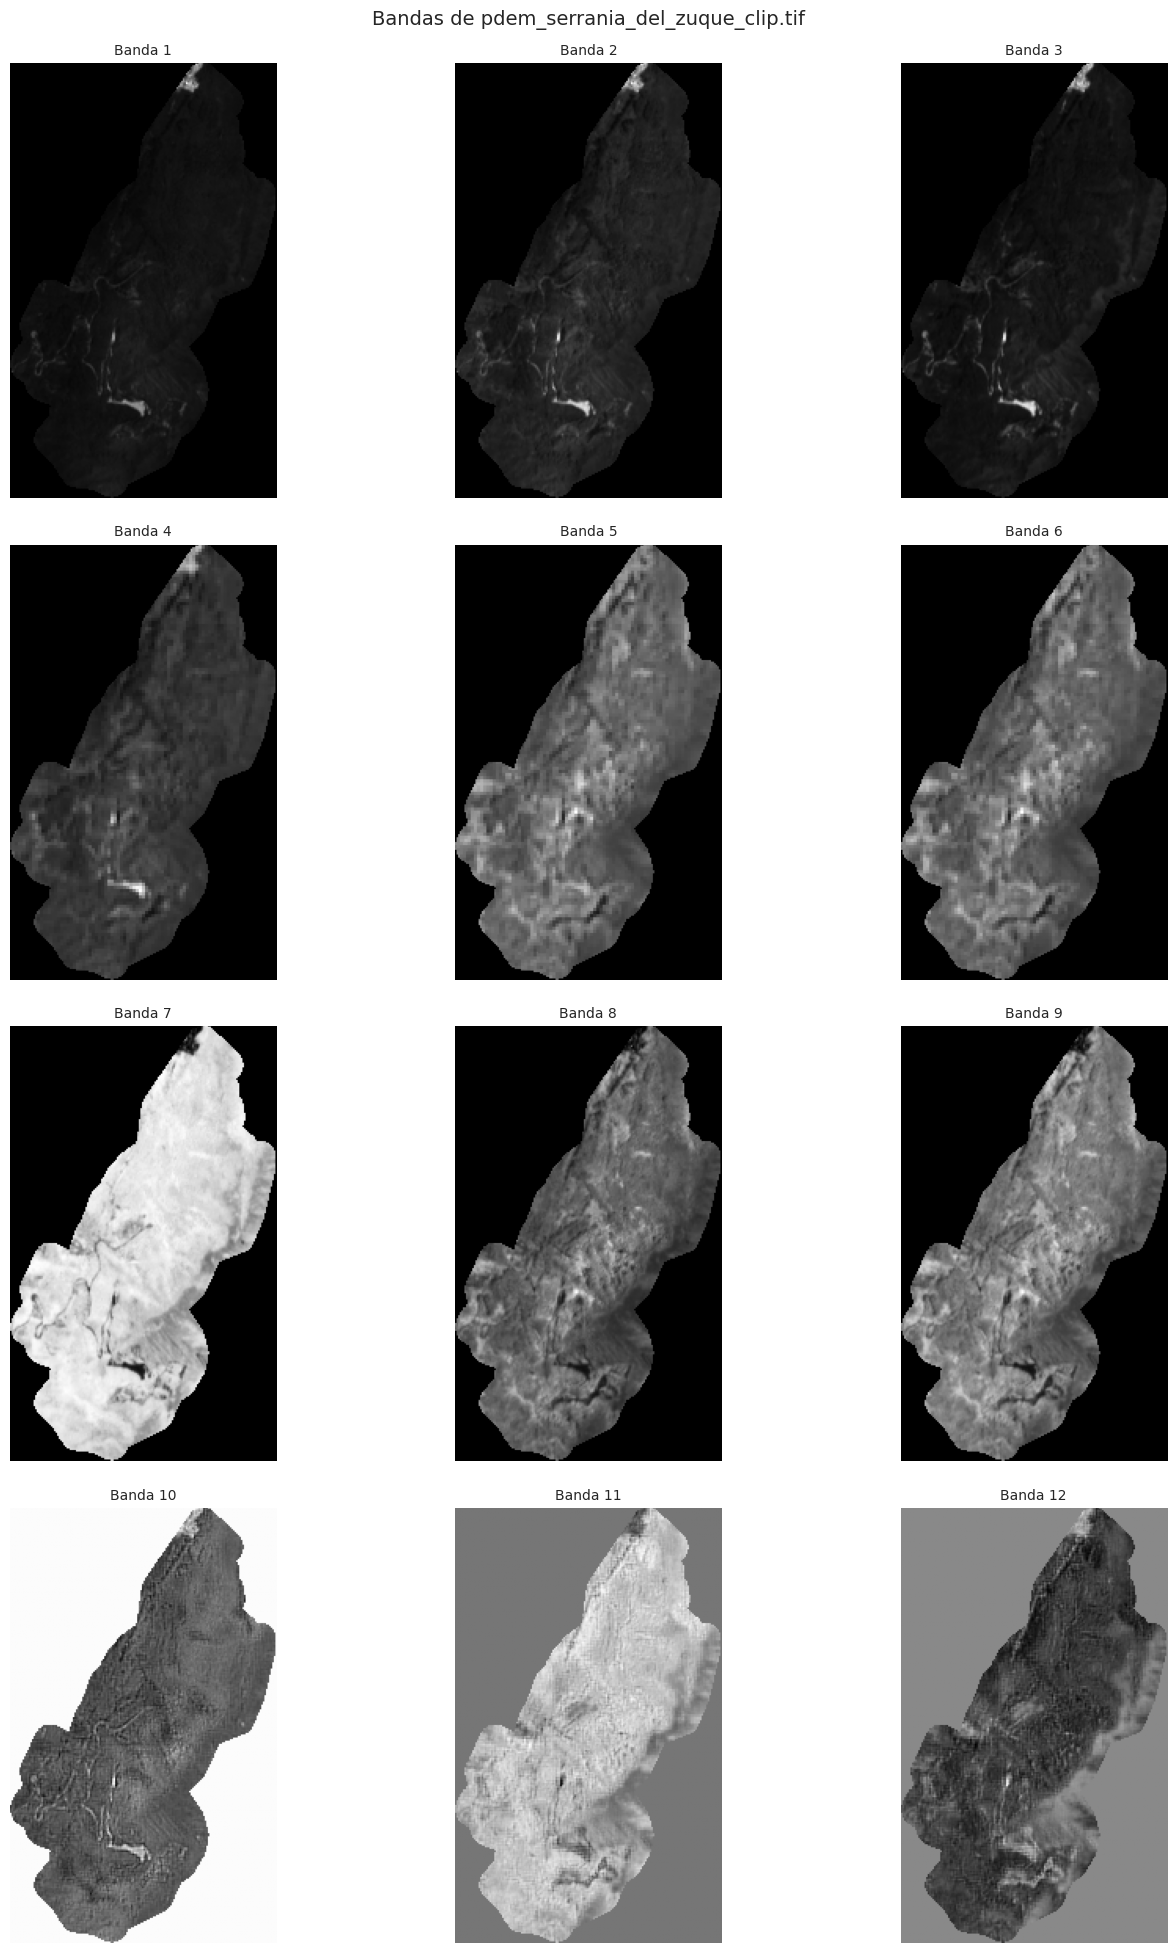

In [ ]:
mosaico_bandas(rutas[4])


In [ ]:

def histograma_bandas(ruta, bins=100):
    with rio.open(ruta) as src:
        n_bandas = src.count
        nombre = ruta.split("/")[-1]

        # Leer todas las bandas
        bandas = [src.read(i).astype(float) for i in range(1, n_bandas + 1)]

    print(f"El archivo {nombre} tiene {n_bandas} bandas.")

    # Colores (rotan si hay más bandas)
    colors = [
        'tomato', 'navy', 'MediumSpringGreen', 'lightblue',
        'orange', 'blue', 'maroon', 'purple',
        'yellow', 'olive', 'brown', 'cyan'
    ]

    # Definir grilla
    cols = 3
    rows = math.ceil(n_bandas / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
    axes = axes.flatten()

    for i, band in enumerate(bandas):
        axes[i].hist(
            band.ravel(),
            bins=bins,
            color=colors[i % len(colors)],
            alpha=0.7
        )
        axes[i].set_title(f"Banda {i+1}", fontsize=10)
        axes[i].set_xlabel("Valor DN / Reflectancia")
        axes[i].set_ylabel("Frecuencia")

    # Quitar subplots sobrantes
    for j in range(i + 1, len(axes)):
        axes[j].axis("off")

    plt.suptitle(f"Histogramas de {nombre}", fontsize=14)
    plt.tight_layout()
    plt.show()


El archivo pdem_entre_nubes_cerro_juan_rey_clip.tif tiene 12 bandas.


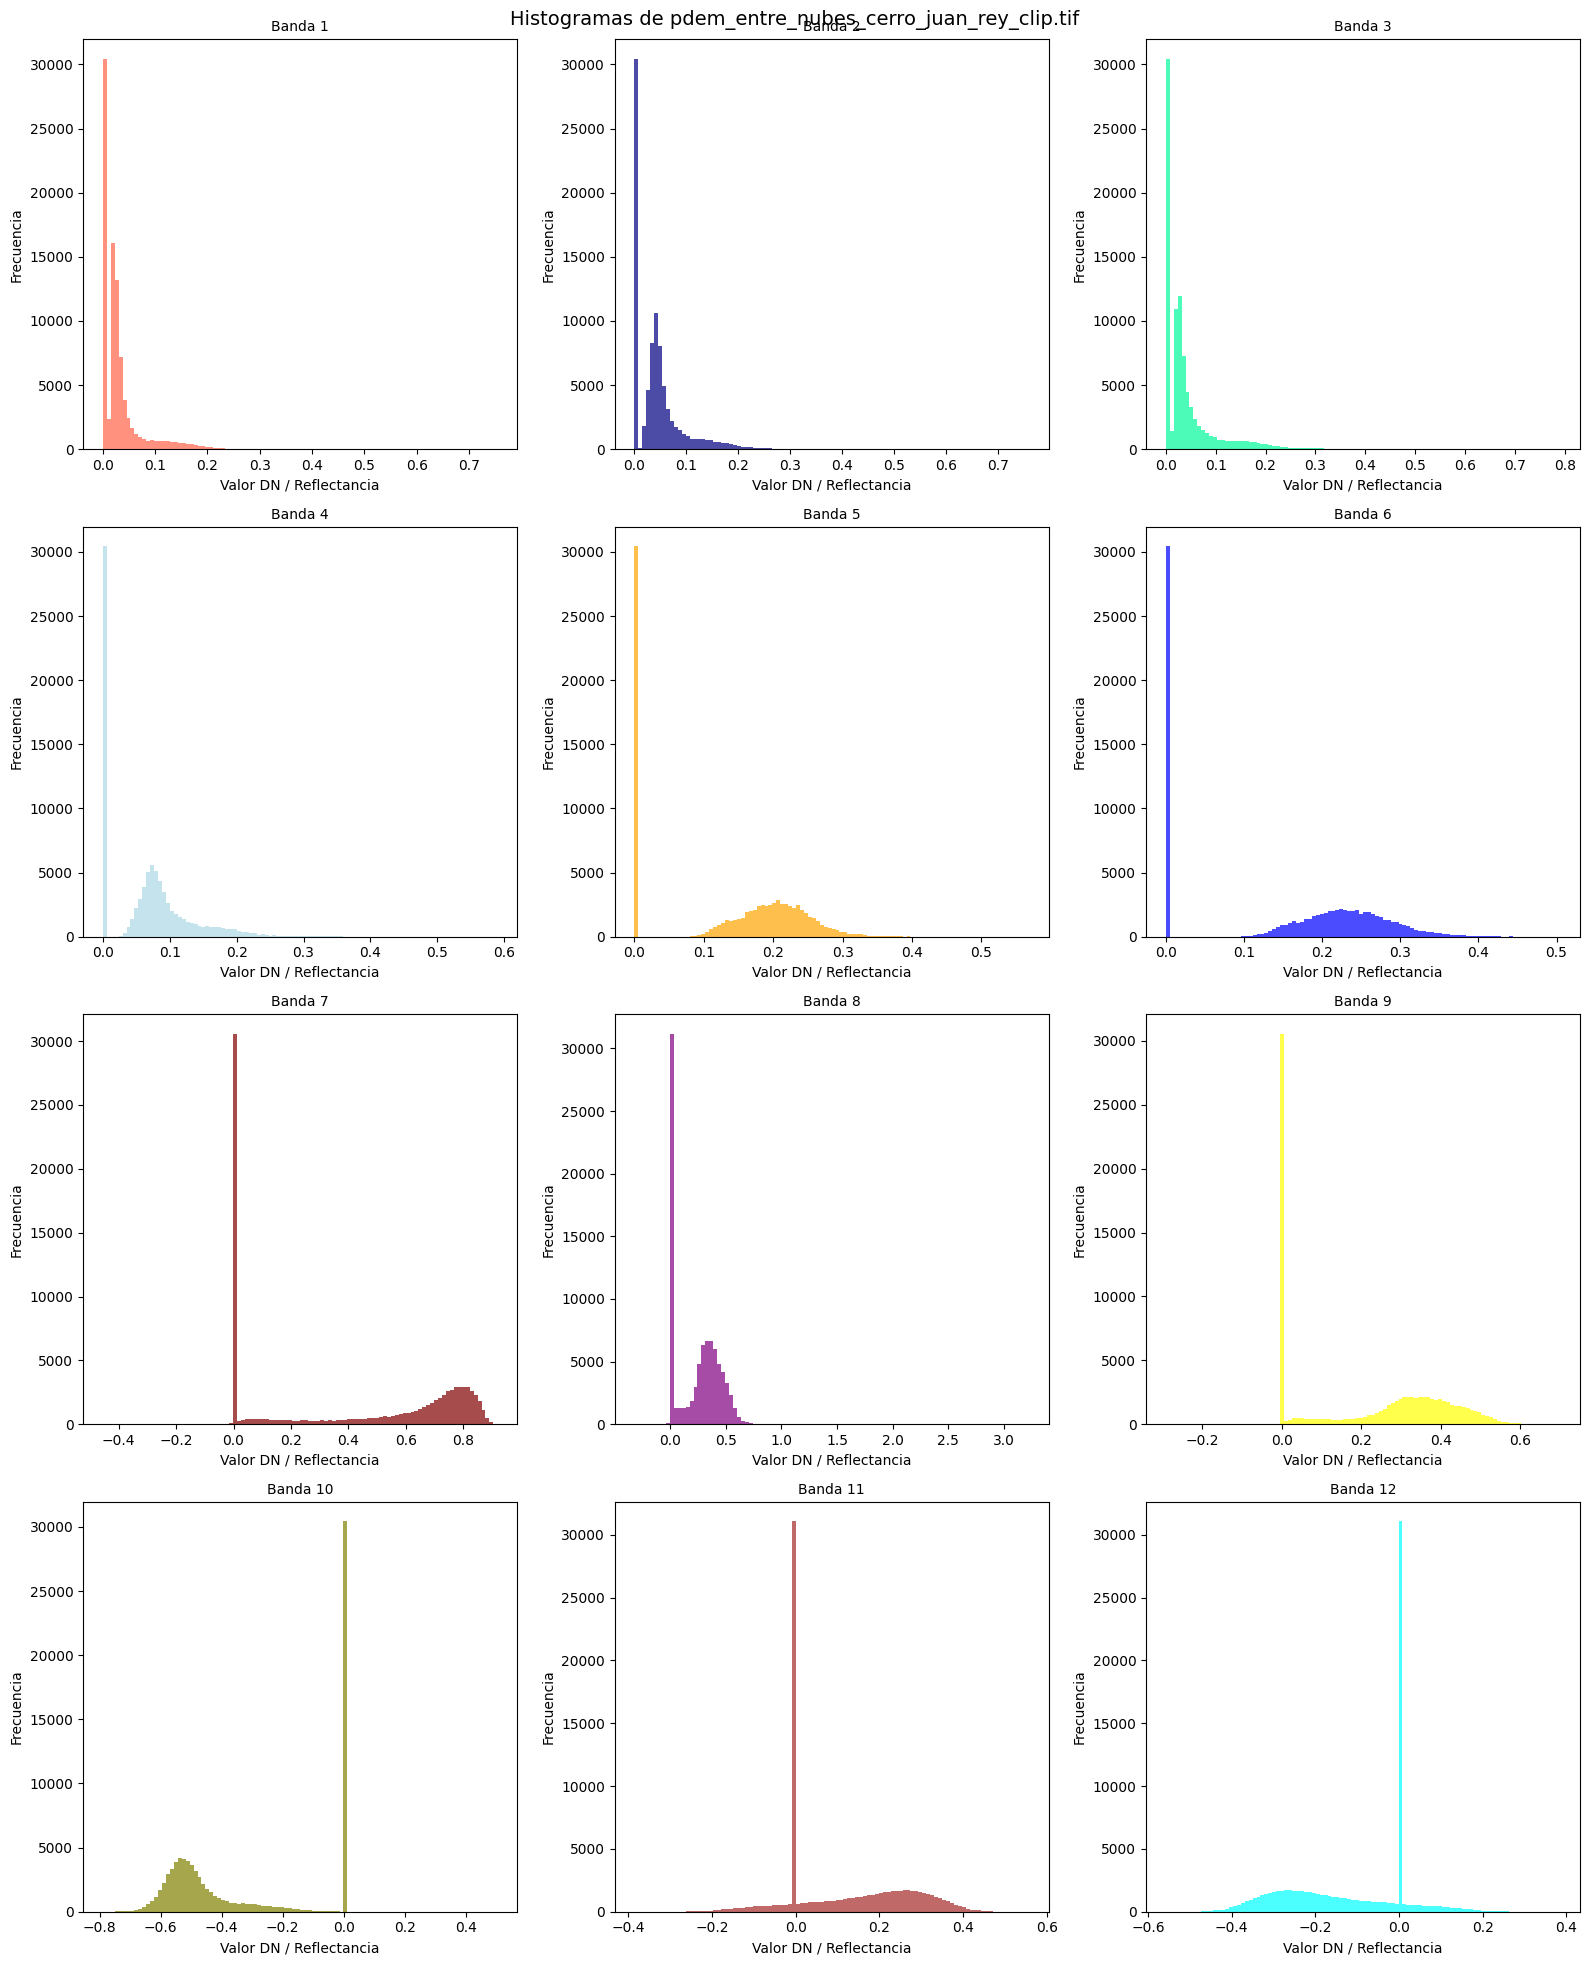

In [ ]:
histograma_bandas(rutas[4])


In [ ]:
filas = src.height
columnas = src.width
print(f"El archivo tiene {filas} filas y {columnas} columnas.")

El archivo tiene 401 filas y 221 columnas.


Preprocesamiento

In [ ]:
# ------------------------------------------------
# Normalización min-max por banda
# ------------------------------------------------
def minmax_normalize(arr):
    return (arr - arr.min()) / (arr.max() - arr.min() + 1e-10)

# ------------------------------------------------
# Preprocesador principal
# ------------------------------------------------
def preprocesar_raster(ruta, usar_scaler=True):
    with rio.open(ruta) as src:
        arr = src.read().astype(float)   # shape = (bandas, filas, columnas)
        n_bandas, filas, columnas = arr.shape

    print(f"Raster: {ruta.split('/')[-1]}")
    print("Shape original:", arr.shape)

    # ---- Normalizar banda por banda ----
    arr_norm = np.array([minmax_normalize(arr[i]) for i in range(n_bandas)])

    # ---- Pasar de (bandas, filas, columnas) → (filas, columnas, bandas) ----
    x = np.moveaxis(arr_norm, 0, -1)
    print("Shape reorganizado:", x.shape)

    # ---- Flatten para ML → (n_pixeles, n_bandas) ----
    X_data = x.reshape(-1, n_bandas)
    print("Shape X_data:", X_data.shape)

    # ---- Scaler opcional (para SVM, NN, LR; no obligatorio para RF/XGBoost) ----
    if usar_scaler:
        scaler = StandardScaler().fit(X_data)
        X_scaled = scaler.transform(X_data)
        print("Shape X_scaled:", X_scaled.shape)
    else:
        scaler = None
        X_scaled = X_data

    return {
        "arr_norm": arr_norm,  # para reconstruir la imagen luego
        "X": X_scaled,         # matriz lista para ML
        "n_bandas": n_bandas,
        "filas": filas,
        "columnas": columnas,
        "scaler": scaler
    }


In [ ]:
data = preprocesar_raster(rutas[4], usar_scaler=True)
X = data["X"]

Raster: pdem_serrania_del_zuque_clip.tif
Shape original: (12, 278, 170)
Shape reorganizado: (278, 170, 12)
Shape X_data: (47260, 12)
Shape X_scaled: (47260, 12)


## 4. Se importan los puntos de entrenamiento

In [ ]:
# Ruta a tu shapefile (ajusta el nombre según corresponda)
shp_path = "/content/drive/MyDrive/UNAL_MIA/ATENEA/SIG/SHAPE/PUNTOS_N1.shp"

# Cargar shapefile
gdf = gpd.read_file(shp_path)

# Revisar contenido
print("Columnas:", gdf.columns)
print("CRS:", gdf.crs)
print("Número de puntos:", len(gdf))
gdf.head()

Columnas: Index(['d_nivel_1_', 'Clase_N1', 'geometry'], dtype='object')
CRS: GEOGCS["unknown",DATUM["D_Unknown_based_on_GRS_1980_ellipsoid",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]
Número de puntos: 9902


,d_nivel_1_,Clase_N1,geometry
0,TERRITORIOS AGRÍCOLAS,4.0,POINT (-74.0966 4.4836)
1,TERRITORIOS AGRÍCOLAS,4.0,POINT (-74.09719 4.48476)
2,TERRITORIOS AGRÍCOLAS,4.0,POINT (-74.097 4.48485)
3,BOSQUES Y AREAS SEMINATURALES,2.0,POINT (-74.09579 4.48526)
4,TERRITORIOS AGRÍCOLAS,4.0,POINT (-74.09634 4.48529)


In [ ]:
# Visualizar las clases
tabla_nivel1 = (
    gdf.groupby("d_nivel_1_")
       .agg(
            conteo=("d_nivel_1_", "size"),
            promedio_claseN1=("Clase_N1", "mean")
       )
       .reset_index()
)

# Mostrar ordenado por conteo (o por promedio si quieres)
tabla_nivel1.sort_values(by="conteo", ascending=False)


,d_nivel_1_,conteo,promedio_claseN1
0,BOSQUES Y AREAS SEMINATURALES,2201,2.0
2,TERRITORIOS AGRÍCOLAS,2201,4.0
3,TERRITORIOS ARTIFICIALIZADOS,2200,5.0
1,SUPERFICIES DE AGUA,1800,3.0
4,ÁREAS HÚMEDAS,1500,1.0


In [ ]:
# Nombrando clases

lulc_name = ['ÁREAS HUMEDAS', 'BOSQUES Y AREAS SEMINATURALES', 'SUPERFICIES DE AGUA', 'TERRITORIOS AGRÍCOLAS','TERRITORIOS ARTIFICIALIZADOS']

## 5. Pre ajuste de puntos y raster

In [ ]:
# --- 1. Raster original ---
ruta = rutas[4]
src = rio.open(ruta)

# --- 2. Raster normalizado (salida de preprocesar_raster) ---
arr_norm = data["arr_norm"]                     # (bandas, filas, columnas)
x = np.moveaxis(arr_norm, 0, -1)                # (filas, columnas, bandas)

# --- 3. Coordenadas de puntos del GeoDataFrame ---
xs = gdf.geometry.x.values
ys = gdf.geometry.y.values

# --- 4. Convertir coordenadas a filas / columnas ---
rows, cols = rio.transform.rowcol(src.transform, xs, ys)

# --- 5. Extraer valores para cada punto ---
X_points = []
valid_idx = []

for i, (r, c) in enumerate(zip(rows, cols)):
    if 0 <= r < x.shape[0] and 0 <= c < x.shape[1]:
        vals = x[r, c, :]   # <-- todas las bandas
        if np.all(np.isfinite(vals)):
            X_points.append(vals)
            valid_idx.append(i)

X_points = np.vstack(X_points)

# --- 6. Extraer clases desde el GeoDataFrame ---
y_points = gdf.iloc[valid_idx]["Clase_N1"].to_numpy()

print("Shape X_points:", X_points.shape)
print("Shape y_points:", y_points.shape)


Shape X_points: (300, 12)
Shape y_points: (300,)


In [ ]:
# Entrenamiento sin escalar (ideal para RF, CART, XGBoost)
X_train, X_test, y_train, y_test = train_test_split(
    X_points,
    y_points,
    test_size=0.3,
    stratify=y_points,
    random_state=42
)

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test :", X_test.shape,  "y_test :", y_test.shape)


X_train: (210, 12) y_train: (210,)
X_test : (90, 12) y_test : (90,)


## 6. Entrenamiento de modelos

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


modelos_base = {
    "CARTO_base": DecisionTreeClassifier(
        random_state=42
    ),

    "RF_base": RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1
    ),

}


In [ ]:
from sklearn.metrics import accuracy_score

resultados_accuracy = {}

for nombre, modelo in modelos_base.items():
    print(f"\nEntrenando modelo: {nombre}")

    # Entrenar
    modelo.fit(X_train, y_train)

    # Predecir
    pred = modelo.predict(X_test)

    # Calcular accuracy
    acc = accuracy_score(y_test, pred)

    # Guardar resultado
    resultados_accuracy[nombre] = acc

# Mostrar resultados de forma ordenada
print("\n=== ACCURACY DE MODELOS (SIN TUNING) ===")
for nombre, acc in resultados_accuracy.items():
    print(f"{nombre}: {acc:.4f}")



Entrenando modelo: CARTO_base

Entrenando modelo: RF_base

=== ACCURACY DE MODELOS (SIN TUNING) ===
CARTO_base: 0.7778
RF_base: 0.8333


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid_carto = {
    "criterion": ["gini", "entropy"],
    "max_depth": [5, 10, 15, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5]
}

print("🔍 Buscando mejores hiperparámetros para CARTO...")

grid_carto = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_carto,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_carto.fit(X_train, y_train)

mejor_carto = grid_carto.best_estimator_

print("✔ Mejor CARTO:", grid_carto.best_params_)


🔍 Buscando mejores hiperparámetros para CARTO...
Fitting 3 folds for each of 72 candidates, totalling 216 fits
✔ Mejor CARTO: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

print("🔍 Buscando mejores hiperparámetros para RF...")

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid=param_grid_rf,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_rf.fit(X_train, y_train)

mejor_rf = grid_rf.best_estimator_

print("✔ Mejor RF:", grid_rf.best_params_)


🔍 Buscando mejores hiperparámetros para RF...
Fitting 3 folds for each of 108 candidates, totalling 324 fits
✔ Mejor RF: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

modelos = {
    # Base models
    "CARTO_base": DecisionTreeClassifier(random_state=42),
    "RF_base": RandomForestClassifier(random_state=42, n_estimators=200, n_jobs=-1),

    # Tuned models
    "CARTO_tuning": mejor_carto,
    "RF_tuning": mejor_rf
}


In [ ]:
from sklearn.metrics import accuracy_score

print("\n=== ACCURACY DE TODOS LOS MODELOS ===")

resultados_accuracy = {}

for nombre, modelo in modelos.items():
    print(f"\nEntrenando {nombre}...")
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, pred)

    resultados_accuracy[nombre] = acc
    print(f"✔ {nombre}: {acc:.4f}")



=== ACCURACY DE TODOS LOS MODELOS ===

Entrenando CARTO_base...
✔ CARTO_base: 0.7778

Entrenando RF_base...
✔ RF_base: 0.8333

Entrenando CARTO_tuning...
✔ CARTO_tuning: 0.7000

Entrenando RF_tuning...
✔ RF_tuning: 0.8111


Matrices de confusión de cada modelo

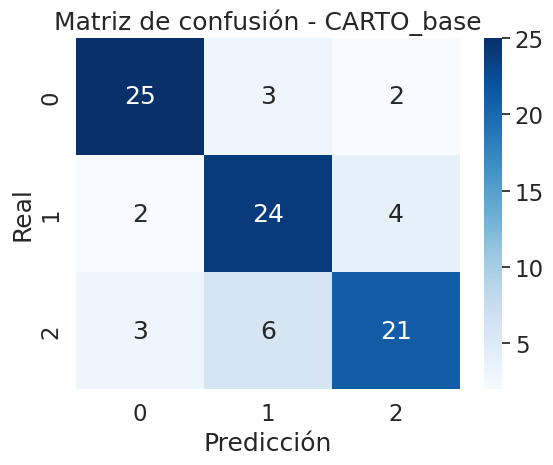

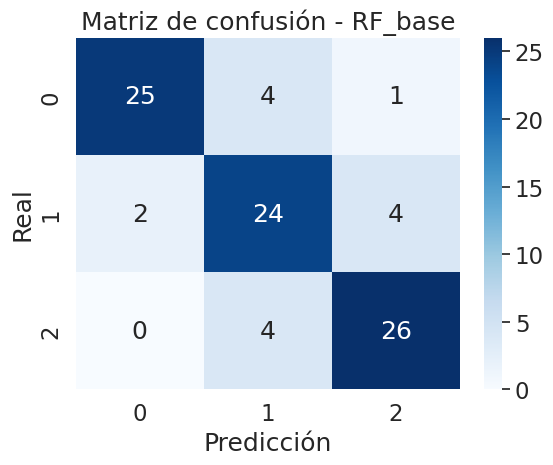

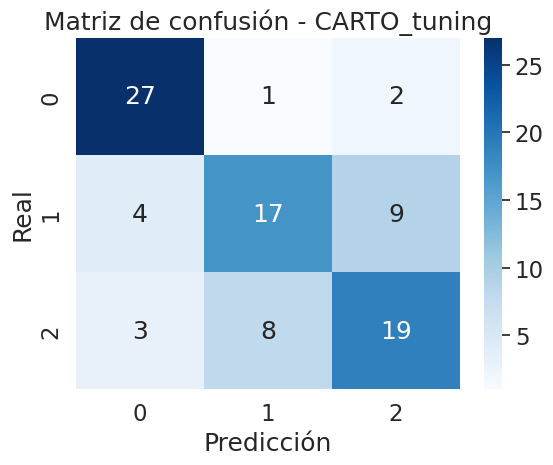

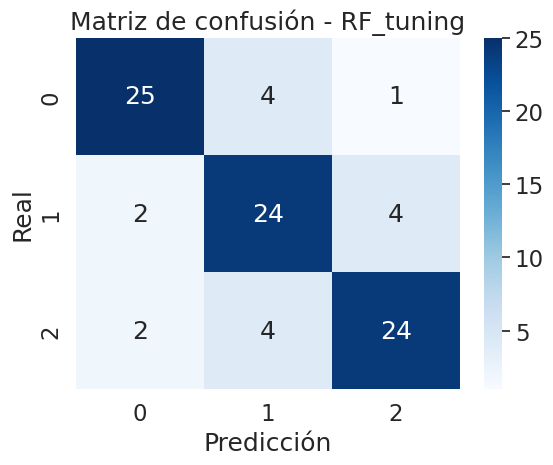

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion(nombre, modelo, X_test, y_test):
    pred = modelo.predict(X_test)
    cm = confusion_matrix(y_test, pred)

    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(f"Matriz de confusión - {nombre}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

# Ejecutar para todos los modelos
for nombre, modelo in modelos.items():
    plot_confusion(nombre, modelo, X_test, y_test)


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

filas = []

for nombre, modelo in modelos.items():
    pred = modelo.predict(X_test)
    report = classification_report(y_test, pred, output_dict=True)

    filas.append({
        "Modelo": nombre,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision_macro": report["macro avg"]["precision"],
        "Recall_macro": report["macro avg"]["recall"],
        "F1_macro": report["macro avg"]["f1-score"]
    })

tabla_metricas = pd.DataFrame(filas)
tabla_metricas


,Modelo,Accuracy,Precision_macro,Recall_macro,F1_macro
0,CARTO_base,0.777778,0.779461,0.777778,0.777360
1,RF_base,0.833333,0.838212,0.833333,0.834615
2,CARTO_tuning,0.700000,0.693766,0.700000,0.694742
3,RF_tuning,0.811111,0.813218,0.811111,0.811737


In [ ]:
importances_carto = modelos["CARTO_tuning"].feature_importances_

for i, imp in enumerate(importances_carto):
    print(f"Banda {i+1}: {imp:.4f}")


Banda 1: 0.0000
Banda 2: 0.0533
Banda 3: 0.1118
Banda 4: 0.0095
Banda 5: 0.0000
Banda 6: 0.1075
Banda 7: 0.3742
Banda 8: 0.0778
Banda 9: 0.0011
Banda 10: 0.2235
Banda 11: 0.0000
Banda 12: 0.0413


In [ ]:
importances_rf = modelos["RF_tuning"].feature_importances_

for i, imp in enumerate(importances_rf):
    print(f"Banda {i+1}: {imp:.4f}")


Banda 1: 0.0865
Banda 2: 0.0918
Banda 3: 0.1738
Banda 4: 0.0648
Banda 5: 0.0497
Banda 6: 0.0707
Banda 7: 0.1268
Banda 8: 0.0391
Banda 9: 0.0429
Banda 10: 0.0981
Banda 11: 0.0771
Banda 12: 0.0787


In [ ]:
feature_names = [
    "B2","B3","B4","B5","B6","B7",
    "NDVI","EVI","SAVI","MNDWI","NDMI","NDBI"
]

grupo_bandas = {
    "B2": "S2 bands",
    "B3": "S2 bands",
    "B4": "S2 bands",
    "B5": "S2 bands",
    "B6": "S2 bands",
    "B7": "S2 bands",

    "NDVI": "S2 VIs",
    "EVI": "S2 VIs",
    "SAVI": "S2 VIs",
    "MNDWI": "S2 VIs",
    "NDMI": "S2 VIs",
    "NDBI": "S2 VIs"
}

colores_grupo = {
    "S2 bands": "red",
    "S2 VIs": "orange"
}



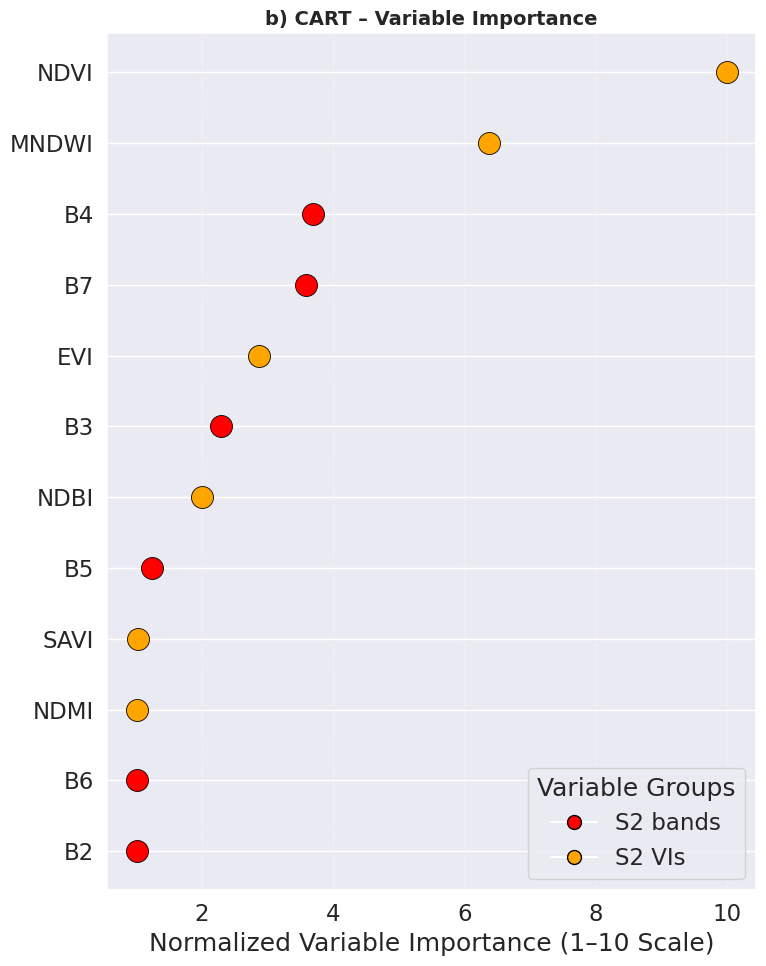

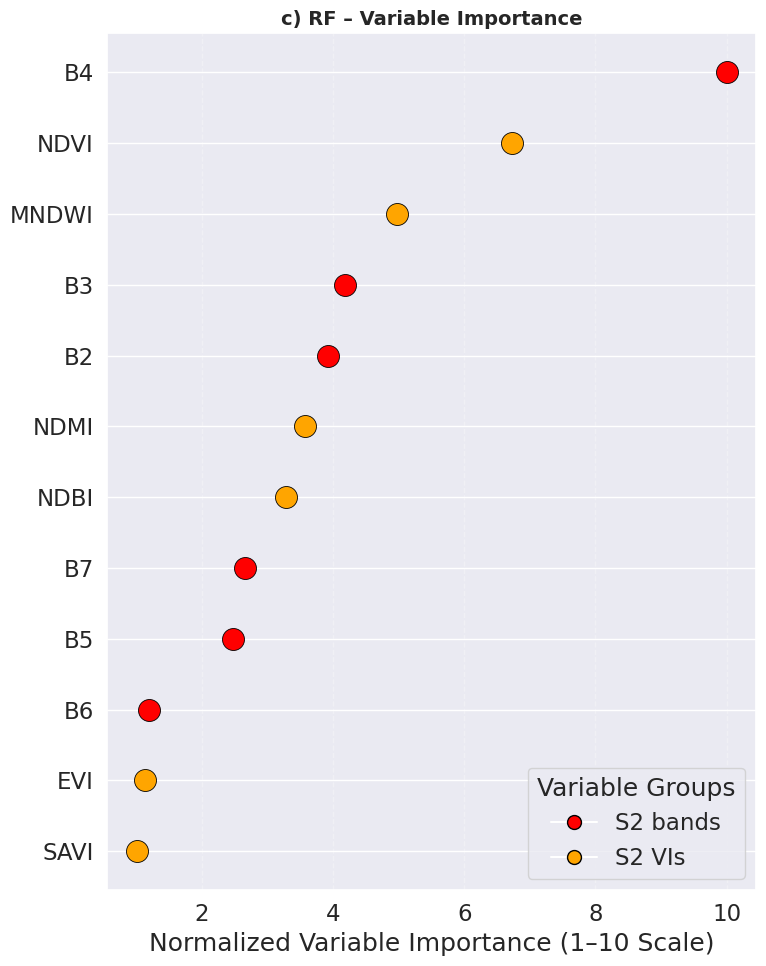

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ======================================================
# Normalizar a escala 1–10
# ======================================================
def normalizar_importancia(importances):
    min_val = np.min(importances)
    max_val = np.max(importances)
    return 1 + 9 * (importances - min_val) / (max_val - min_val)


# ======================================================
# Graficar importancia tipo "paper"
# ======================================================
def plot_importancias(modelo_nombre, importances, feature_names, grupo_bandas, colores_grupo):

    # Normalización 1–10
    import_norm = normalizar_importancia(importances)

    # Ordenar por importancia
    idx = np.argsort(import_norm)
    import_norm_sorted = import_norm[idx]
    nombres_sorted = [feature_names[i] for i in idx]
    grupos_sorted = [grupo_bandas[n] for n in nombres_sorted]

    # Figura
    plt.figure(figsize=(8, 10))

    # Dibujar puntos estilo bubble
    for y, (imp, var, grupo) in enumerate(zip(import_norm_sorted, nombres_sorted, grupos_sorted)):
        plt.scatter(
            imp, y,
            s=250,
            color=colores_grupo[grupo],
            edgecolors="black",
            linewidth=0.6
        )

    plt.yticks(range(len(nombres_sorted)), nombres_sorted)
    plt.xlabel("Normalized Variable Importance (1–10 Scale)")
    plt.title(f"{modelo_nombre} – Variable Importance", fontsize=14, fontweight="bold")
    plt.grid(axis="x", linestyle="--", alpha=0.3)

    # Leyenda por grupos
    handles = [
        plt.Line2D(
            [0], [0], marker='o', color='w',
            markerfacecolor=colores_grupo[g],
            markeredgecolor='black',
            markersize=10,
            label=g
        )
        for g in colores_grupo
    ]
    plt.legend(handles=handles, title="Variable Groups", loc="lower right")

    plt.tight_layout()
    plt.show()


# ======================================================
# Obtener importancias
# ======================================================

importances_carto = modelos["CARTO_tuning"].feature_importances_
importances_rf = modelos["RF_base"].feature_importances_


# ======================================================
# Graficar CART
# ======================================================
plot_importancias(
    modelo_nombre="b) CART",
    importances=importances_carto,
    feature_names=feature_names,
    grupo_bandas=grupo_bandas,
    colores_grupo=colores_grupo
)

# ======================================================
# Graficar RF
# ======================================================
plot_importancias(
    modelo_nombre="c) RF",
    importances=importances_rf,
    feature_names=feature_names,
    grupo_bandas=grupo_bandas,
    colores_grupo=colores_grupo
)


In [ ]:
# --- Raster seleccionado ---
ruta = rutas[4]   # o el humedal que estés usando

# --- Raster normalizado que ya generaste ---
arr_norm = data["arr_norm"]       # (bandas, filas, columnas)

# --- Reordenar de (bandas, h, w) a (h, w, bandas) ---
x = np.moveaxis(arr_norm, 0, -1)

# --- Guardar dimensiones ---
h, w, n_bandas = x.shape

# --- Generar matriz 2D para predicción ---
X_data = x.reshape(-1, n_bandas)

print("X_data:", X_data.shape)



X_data: (47260, 12)


Visualiación de la clasificación

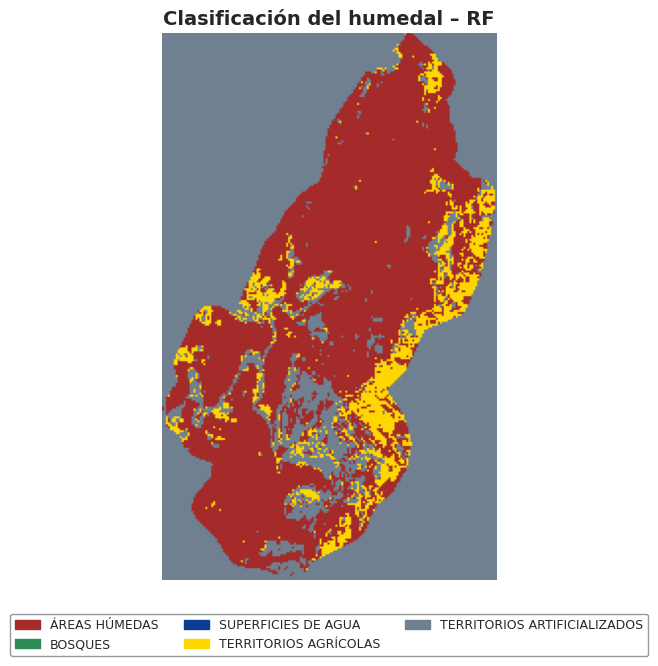

In [ ]:
# Define colors and labels
class_colors = [
    '#A52A2A',  # 1. ÁREAS HÚMEDAS
    '#2E8B57',  # 2. BOSQUES
    '#0B3D91',  # 3. SUPERFICIES DE AGUA
    '#FFD700',  # 4. TERRITORIOS AGRÍCOLAS
    '#708090'   # 5. TERRITORIOS ARTIFICIALIZADOS
]

class_labels = [
    "ÁREAS HÚMEDAS",
    "BOSQUES",
    "SUPERFICIES DE AGUA",
    "TERRITORIOS AGRÍCOLAS",
    "TERRITORIOS ARTIFICIALIZADOS"
]


plot_classification(
    modelo = modelos["RF_base"],      # o CARTO_tuning
    X_data = X_data,
    raster_path = ruta,                 # ahora SÍ consistente
    class_colors = class_colors,
    class_labels = class_labels,
    title = "Clasificación del humedal – RF",
    scaler = None
)

